In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Principal component analysis (PCA)

In [82]:
df = pd.read_csv("data/house_prices.csv")

In [83]:
df.shape

(1460, 81)

In [84]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [85]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [86]:
X = df.values

In [87]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [88]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

In [89]:
non_numeric_cols.shape

(43,)

In [90]:
df_numeric = df.drop(columns=non_numeric_cols)

In [91]:
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [92]:
df_numeric.shape

(1460, 38)

In [93]:
df_numeric.dropna(inplace=True)

In [94]:
labels = df_numeric["SalePrice"]

In [95]:
df_numeric.drop(["SalePrice"], axis=1, inplace=True)

In [96]:
X = df_numeric.values

In [97]:
scaler = StandardScaler()

In [98]:
X_scaled = scaler.fit_transform(X)

In [99]:
X_scaled

array([[-1.72580691,  0.09229529, -0.23357027, ..., -0.14140664,
        -1.61534509,  0.15308355],
       [-1.72342925, -0.86569565,  0.38483378, ..., -0.14140664,
        -0.49871497, -0.59629052],
       [-1.72105159,  0.09229529, -0.10988946, ..., -0.14140664,
         0.99012519,  0.15308355],
       ...,
       [ 1.73844606,  0.33179303, -0.19234334, ..., 14.94738799,
        -0.49871497,  1.65183171],
       [ 1.74082372, -0.86569565, -0.10988946, ..., -0.14140664,
        -0.87092501,  1.65183171],
       [ 1.74320138, -0.86569565,  0.17869909, ..., -0.14140664,
        -0.12650493,  0.15308355]])

In [100]:
cov_matrix = np.cov(X_scaled, rowvar=False)

In [101]:
cov_matrix

array([[ 1.00089286e+00,  2.19570656e-02, -1.33004348e-02, ...,
         4.58399916e-02, -5.70377412e-04,  1.34186136e-02],
       [ 2.19570656e-02,  1.00089286e+00, -3.87285055e-01, ...,
        -4.07250021e-02, -2.71946418e-02, -1.24589432e-02],
       [-1.33004348e-02, -3.87285055e-01,  1.00089286e+00, ...,
         1.47205086e-03,  1.88313334e-02,  1.32789166e-02],
       ...,
       [ 4.58399916e-02, -4.07250021e-02,  1.47205086e-03, ...,
         1.00089286e+00,  2.00849786e-02,  3.41365311e-02],
       [-5.70377412e-04, -2.71946418e-02,  1.88313334e-02, ...,
         2.00849786e-02,  1.00089286e+00, -1.50711056e-01],
       [ 1.34186136e-02, -1.24589432e-02,  1.32789166e-02, ...,
         3.41365311e-02, -1.50711056e-01,  1.00089286e+00]])

In [102]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [103]:
eigenvalues

array([-6.35674934e-16, -5.64607328e-16,  1.03816125e-01,  1.20983035e-01,
        1.41362270e-01,  1.74763290e-01,  2.05518560e-01,  2.50064734e-01,
        2.61835645e-01,  3.09921470e-01,  3.79108617e-01,  3.88666788e-01,
        4.70638034e-01,  5.28738026e-01,  6.02694558e-01,  6.45487783e-01,
        6.85225790e-01,  7.46917165e-01,  7.62354586e-01,  7.89561893e-01,
        8.42468163e-01,  8.92281098e-01,  9.15330184e-01,  9.23529989e-01,
        1.02504068e+00,  1.03645740e+00,  1.07465358e+00,  1.10585208e+00,
        1.13016089e+00,  1.14200795e+00,  1.22406819e+00,  1.25840387e+00,
        1.51945851e+00,  2.04011056e+00,  2.70573401e+00,  3.16133329e+00,
        7.46848691e+00])

In [104]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [105]:
eigenvalues = eigenvalues[sorted_indices]

In [106]:
eigenvectors = eigenvectors[:, sorted_indices]

In [107]:
eigenvectors.shape

(37, 37)

In [108]:
eigenvalues

array([ 7.46848691e+00,  3.16133329e+00,  2.70573401e+00,  2.04011056e+00,
        1.51945851e+00,  1.25840387e+00,  1.22406819e+00,  1.14200795e+00,
        1.13016089e+00,  1.10585208e+00,  1.07465358e+00,  1.03645740e+00,
        1.02504068e+00,  9.23529989e-01,  9.15330184e-01,  8.92281098e-01,
        8.42468163e-01,  7.89561893e-01,  7.62354586e-01,  7.46917165e-01,
        6.85225790e-01,  6.45487783e-01,  6.02694558e-01,  5.28738026e-01,
        4.70638034e-01,  3.88666788e-01,  3.79108617e-01,  3.09921470e-01,
        2.61835645e-01,  2.50064734e-01,  2.05518560e-01,  1.74763290e-01,
        1.41362270e-01,  1.20983035e-01,  1.03816125e-01, -5.64607328e-16,
       -6.35674934e-16])

In [109]:
def pca(X_scaled, eigenvectors, eigenvalues, n_components=2):
    sort_indices = np.argsort(eigenvalues)[::-1]
    desc_eigenvalues, desc_eigenvectors = eigenvalues[sort_indices], eigenvectors[sort_indices]
    X_pca = X_scaled.dot(desc_eigenvectors[:, :n_components])
    if n_components == 1:
        plt.hlines(1,1,20)
        plt.eventplot(X_pca.flatten(), orientation='horizontal', colors='b')
        plt.axis('off')
        plt.show()
    elif n_components == 2:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.xlabel("PC1")
        plt.xlabel("PC2")
        plt.show()
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.show()

    return X_pca

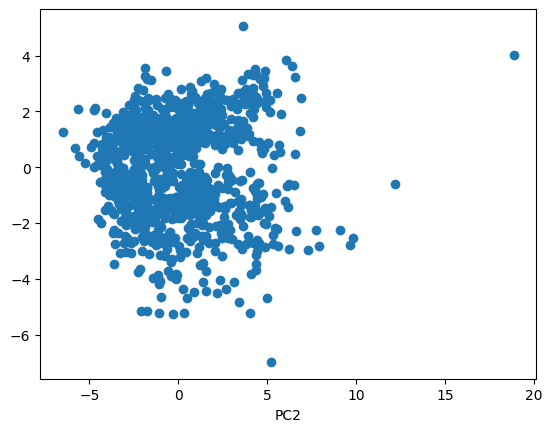

In [110]:
X_pca = pca(X_scaled, eigenvectors, eigenvalues, 2)

# Linear Discriminant Analysis (LDA)

In [111]:
from sklearn.datasets import load_iris

In [112]:
data = load_iris()

In [113]:
X = data.data
y = data.target

In [114]:
X.shape, y.shape

((150, 4), (150,))

In [115]:
n_classes = np.unique(y).shape[0]

In [116]:
n_features = X.shape[1]

In [117]:
c_means = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])

In [118]:
c_means

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [119]:
o_means = np.mean(X, axis=0)
o_means

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [120]:
sw = np.zeros((n_features, n_features))

In [121]:
for c in range(n_classes):
    class_samples = X[y == c]
    mean_vector = c_means[c]
    swc = np.sum([(x - mean_vector).reshape(-1,1) @ (x - mean_vector).reshape(1, -1) for x in class_samples], axis=0)
    sw += swc

In [122]:
sw

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [123]:
sb = np.zeros((n_features, n_features))

In [124]:
for c in np.unique(y):
    N_c = np.sum(y == c)
    mean_vector = c_means[c]
    mean_diff = (mean_vector - o_means).reshape(-1, 1)
    sbc = N_c * (mean_diff @ mean_diff.T)
    sb += sbc

In [125]:
sb

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [126]:
sw_inv = np.linalg.inv(sw)

In [127]:
eigenvalues, eigenvectors = np.linalg.eig(sw_inv @ sb)

In [128]:
if np.iscomplex(eigenvalues).any():
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

In [129]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [130]:
desc_eigenvals = eigenvalues[sorted_indices]
desc_eigenvecs = eigenvectors[sorted_indices]

In [131]:
X_scaled = scaler.fit_transform(X)

In [132]:
k = n_classes - 1
W = desc_eigenvecs[:, :k]
X_lda = X_scaled @ W

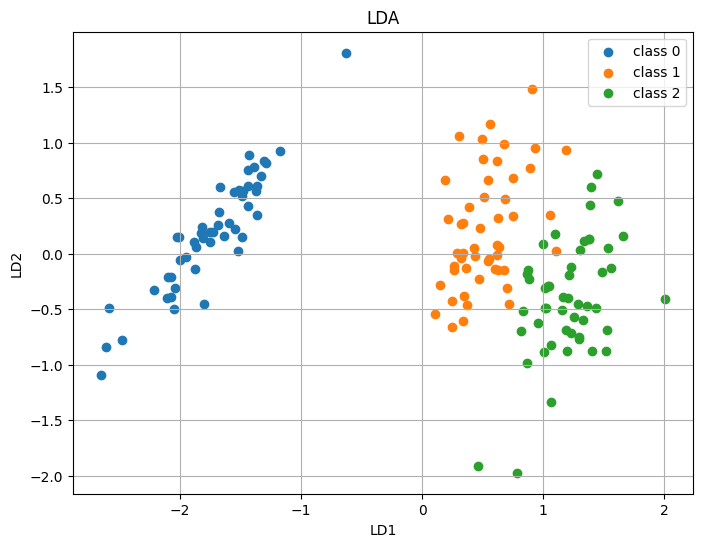

In [133]:
plt.figure(figsize=(8, 6))
for c in np.unique(y):
    plt.scatter(X_lda[y == c, 0], X_lda[y == c, 1], label=f'class {c}')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')
plt.grid(True)
plt.legend()
plt.show()

# t-distributed stochastic neighbor embedding (t-SNE)

In [134]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [135]:
def get_original_pairwise_affinities(X: np.ndarray, perplexity: int = 10) -> np.ndarray:
    n = len(X)
    p_ij = np.zeros(shape=(n, n))
    H_target = np.log2(perplexity) # target entropy

    for i in range(0, n):
        beta = 1.0
        tolerance = 1e-5
        max_iterations = 50
        iteration = 0
        p = None
        while iteration < max_iterations:
            iteration += 1
            diff = X[i] - X
            norm = np.linalg.norm(diff, axis=1)
            p = np.exp(-(norm**2) * beta)
            p /= np.sum(p)
            p[i] = 0
            p = np.maximum(p, 1e-10)
            H_here = np.sum(-p * np.log2(p))
            if np.abs(H_here - H_target) <= tolerance:
                break
            elif H_here > H_target:
                beta *= 2
            else:
                beta /= 2
        p_ij[i, :] = p

    p_ij = np.maximum(p_ij, 1e-10)

    return p_ij

In [136]:
def get_symmetric_p_ij(p_ij: np.ndarray) -> np.ndarray:
    n = len(p_ij)
    p_ij_symmetric = np.zeros(shape=(n, n))
    for i in range(0, n):
        for j in range(0, n):
            p_ij_symmetric[i, j] = (p_ij[i, j] + p_ij[j, i]) / (2 * n)

    p_ij_symmetric = np.maximum(p_ij_symmetric, 1e-10)

    return p_ij_symmetric

In [138]:
def get_low_dimensional_affinities(Y: np.ndarray) -> np.ndarray:
    n = len(Y)
    q_ij = np.zeros(shape=(n, n))

    for i in range(0, n):
        diff = Y[i] - Y
        norm = np.linalg.norm(diff, axis=1)
        q_ij[i, :] = (1 + norm**2) ** (-1)

    np.fill_diagonal(q_ij, 0)

    q_ij = q_ij / q_ij.sum()

    q_ij = np.maximum(q_ij, 1e-10)

    return q_ij

In [139]:
def get_gradient(p_ij: np.ndarray, q_ij: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(p_ij)

    # compute gradient
    gradient = np.zeros(shape=(n, Y.shape[1]))
    for i in range(0, n):
        diff = Y[i] - Y
        A = np.array([(p_ij[i, :] - q_ij[i, :])])
        B = np.array([(1 + np.linalg.norm(diff, axis=1)) ** (-1)])
        C = diff
        gradient[i] = 4 * np.sum((A * B).T * C, axis=0)

    return gradient

In [154]:
def tsne(X: np.ndarray, perplexity: int = 10, T: int = 1000, lr: int = 200, early_exaggeration: int = 4, n_dimensions: int = 2):
    n = len(X)
    costs = []
    # Get original affinities matrix
    p_ij = get_original_pairwise_affinities(X, perplexity)
    p_ij_symmetric = get_symmetric_p_ij(p_ij)

    # Initialization
    Y = np.zeros(shape=(T, n, n_dimensions))
    Y_minus1 = np.zeros(shape=(n, n_dimensions))
    Y[0] = Y_minus1
    Y1 = np.random.rand(X.shape[0], n_dimensions)
    Y[1] = np.array(Y1)

    for t in range(1, T - 1):
        if t < 250:
            a = 0.5
            early_exaggeration = early_exaggeration
        else:
            a = 0.8
            early_exaggeration = 1

        q_ij = get_low_dimensional_affinities(Y[t])

        gradient = get_gradient(early_exaggeration * p_ij_symmetric, q_ij, Y[t])

        Y[t + 1] = Y[t] - lr * gradient + a * (Y[t] - Y[t - 1])

        if t % 50 == 0 or t == 1:
            cost = np.sum(p_ij_symmetric * np.log(p_ij_symmetric / q_ij))
            costs.append(cost)
            print(f"Loss: {cost}")

    history = Y[-1]

    return history, costs, Y

In [141]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=1000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [157]:
history, costs, Y = tsne(X, perplexity=10, T=2000, lr=200, early_exaggeration=4, n_dimensions=2)

Loss: 1.2098074714682359
Loss: 0.6308065787656304
Loss: 0.5879867641856299
Loss: 0.5811518035629195
Loss: 0.5804031023651026
Loss: 0.5803824238919242
Loss: 0.20725241080626883
Loss: 0.2080344482265802
Loss: 0.20883396430795834
Loss: 0.20851813211918846
Loss: 0.20840762817290787
Loss: 0.2082687757093169
Loss: 0.20812044509352107
Loss: 0.20798765108581907
Loss: 0.20787621368830098
Loss: 0.20778166504805234
Loss: 0.20770042440609135
Loss: 0.20762871964507973
Loss: 0.20756483726168265
Loss: 0.20750761889336847
Loss: 0.2074560783665255
Loss: 0.20740936543944416
Loss: 0.20736676341695262
Loss: 0.2073276724680894
Loss: 0.2072915862982399
Loss: 0.20725807068112526
Loss: 0.20722674796423363
Loss: 0.2071972892823414
Loss: 0.20716941466182784
Loss: 0.20714289858564425
Loss: 0.2071175744443494
Loss: 0.20709332857452617
Loss: 0.20707007865073737
Loss: 0.20704774241005292
Loss: 0.20702621158197534
Loss: 0.20700534382196972
Loss: 0.20698497664220875
Loss: 0.2069649602675968
Loss: 0.20694520046387777


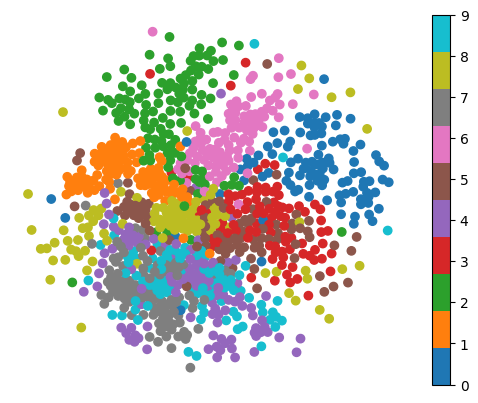

In [156]:
fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis("off")
plt.colorbar(g1, ax=ax)
plt.show()